# Word Cloud from a Pandas DataFrame in Python
https://towardsdatascience.com/configuring-jupyter-notebook-in-windows-subsystem-linux-wsl2-c757893e9d69

https://thecleverprogrammer.com/2021/11/11/word-cloud-from-a-pandas-dataframe-in-python/

https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

https://anaconda.org/conda-forge/stop-words

In [1]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from stop_words import get_stop_words
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
from PIL import Image
import random

In [3]:
data = pd.read_csv("cleaned_tweet.csv", sep=";", low_memory=False)

In [85]:
wordcount = {}
stopwords = ["lia", "thomas"]

for wordlist in data["tokenized"].values:
    line = wordlist[1:-1].replace(",", "")
    line = line.replace('"', "")
    line = line.replace("'", "")
    line = line.split()
    for word in line:
        if word not in stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

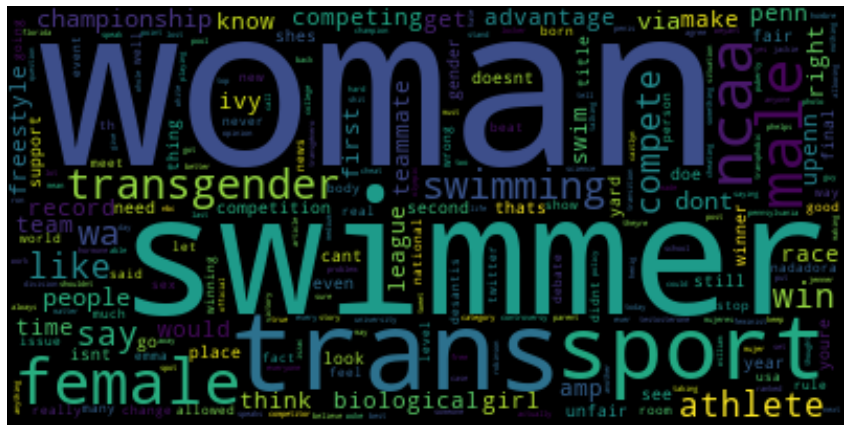

In [89]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

wordcloud = WordCloud(background_color="black", max_words=5000, contour_color="#005eb9").generate_from_frequencies(wordcount)
# wordcloud = WordCloud(stopwords=stopwords, background_color="black", mask = android_bg, max_words=5000, contour_color="black").generate_from_frequencies(wordcount)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud.recolor(random_state=3), interpolation='bilinear')
# wordcloud.to_file("lia thomas tweet android bg.png")
plt.axis("off")
plt.show()

In [ ]:
data = pd.read_csv("lia_thomas_one_year.csv", sep=";")

In [ ]:
stopwords = get_stop_words('english') + get_stop_words('portuguese') + ["&amp;", "es", "y", "un", "la", "'", ",", "en"]

In [50]:
data['Text'] = data.Text.str.replace('https' , '', regex=False)
data['Text'] = data.Text.str.replace('Lia' , '', regex=False, case=False)
data['Text'] = data.Text.str.replace('Thomas' , '', regex=False, case=False)

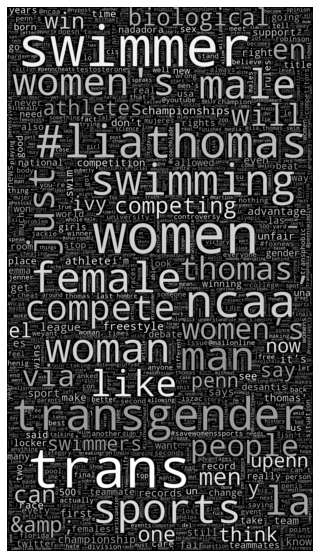

In [60]:
stopwords = get_stop_words('english') + get_stop_words('portuguese')
# ncaa_logo = np.array(Image.open("NCAA_logo.png"))
android_bg = np.array(Image.open("android_background.png"))
# wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# wordcloud = WordCloud(stopwords=stopwords, background_color="black", mask = ncaa_logo, max_words=5000, contour_color="#005eb9").generate_from_frequencies(wordcount)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", mask = android_bg, max_words=5000, contour_color="black").generate_from_frequencies(wordcount)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
wordcloud.to_file("lia thomas tweet android bg.png")
plt.axis("off")
plt.show()

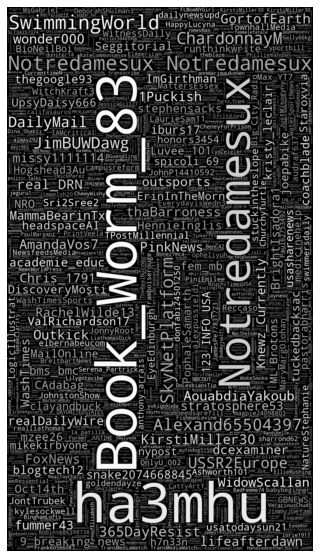

In [63]:
text = " ".join(i for i in data.Username)
# stopwords = get_stop_words('english') + get_stop_words('portuguese')
# ncaa_logo = np.array(Image.open("NCAA_logo.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="black", mask = android_bg, max_words=5000, contour_color="black").generate(text)
# wordcloud = WordCloud(stopwords=stopwords, background_color="black", mask = ncaa_logo, contour_color="#005eb9").generate_from_frequencies(wordcount)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.show()

How many most common words to print:  10


swimmer :  14543
women :  14175
trans :  13993
ncaa :  9502
#liathomas :  9118
transgender :  8981
swimming :  8209
female :  7775
woman :  7753
sports :  7632


<AxesSubplot:xlabel='Word'>

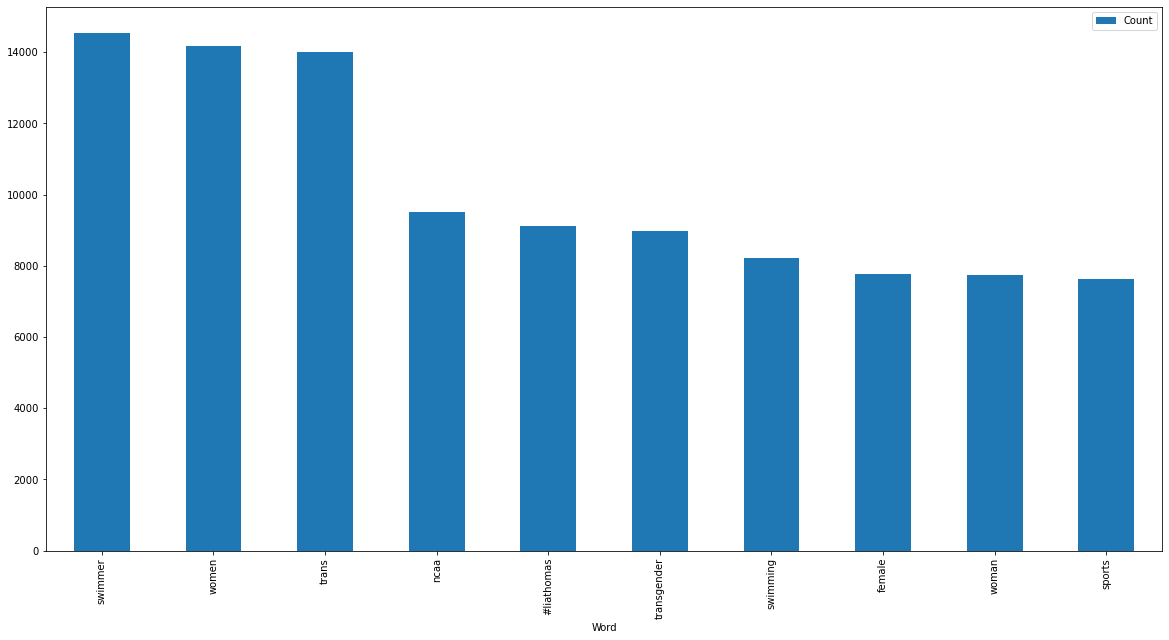

In [19]:
data.Text
wordcount = {}

post = [line.lower() for line in data.Text]
for line in post:
    line = line.replace(".","")
    line = line.replace(":","")
    line = line.replace("\"","")
    line = line.replace("!","")
    line = line.replace("?","")
    line = line.replace("â€œ","")
    line = line.replace("â€˜","")
    line = line.replace("*","")
    line = line.split()
    for word in line:
        if word not in stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

wordcount = {key:wordcount[key] for key in wordcount if wordcount[key]<15000}
            
            
%matplotlib inline
n_print = int(input("How many most common words to print: "))

word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word', y='Count', figsize = [20, 10])

In [ ]:
%matplotlib inline

# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}

# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in data.text.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')